In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot settings
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [3]:
# Functions
def load_data(angle = 0, procent_of_data = 1, length_of_data = 10):
    data = pd.DataFrame({'Frekvens': [], 'Kanal A': [], 'Kanal B': []})
    with open(f'../Data/eks_2/angle_{angle}.csv', 'r') as file:
        count = 0
        for i in range(3, length_of_data):
            if i % int(1/procent_of_data) == 0:
                try:
                    data.loc[count] = [float(x.replace(',', '.')) for x in file.readline().split(';')]
                    count += 1
                except:
                    pass
            file.readline()
    return data

def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), label = None):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.plot(data[x], data[y], label = label, color = '#006663')

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Return fig and ax
    return fig, ax

def plot_ax(ax, legend = False, grid = False, save = False, show = False, close = False, filename = 'default.pdf'):
    if grid:
        ax.grid()
    if legend:
        ax.legend()
    if save:
        plt.savefig(filename)
    if show:
        plt.show()
    if close:
        plt.close()
        
def angle_to_rad(x):
    return np.pi/180 * float(x[0])

def factor_10_1(x):
    return 10 * float(x[1])

def factor_10_2(x):
    return 10 * float(x[1])

In [4]:
# Get length of dataframe
length = 50004

# Load in data in dataframe of kind: "{angle_0: data_0, angle_1: data_1, ...}"
angles = [f'{x}' for x in range(0, 93, 4)]
data = pd.DataFrame({'Angle': [], 'Mean Peak Value': []})
print('Started calculations! \n')
for i, angle in enumerate(angles):
    # Load in a percent of the data
    df = load_data(angle = angle, procent_of_data = 0.01, length_of_data = length)
    
    # Calculate the mean of the peaks
    index = int(len(df) / 80)
    mean = np.mean(sorted(list(df['Kanal B']))[-index])
    print(f'Mean peak value found to be, {round(mean, 2)}, for angle {angle} \n')
    
    # Make a fig and save it as a pdf to look for errors
    # Make ax and fig
    fig, ax = make_ax(df, x = 'Kanal A', y = 'Kanal B', figsize = (12, 8), 
                      title = f'Angle: {angle}, Mean peak value: {round(mean, 2)}', 
                      xlabel = 'Kanal A (V)', ylabel = 'Kanal B (V)')
    plt.axhline(y = mean, color = "black", linestyle = "--")

    # Plot ax
    plot_ax(ax, grid = True, save = False, close = True, filename = f'../Cleaned_Data/Pdf_2/mean_angle_{angle}.pdf')
    
    # Save mean value with angle to data
    data.loc[i] = [angle, mean]
print('Finished calculations!')

Started calculations! 

Mean peak value found to be, 8.3, for angle 0 

Mean peak value found to be, 7.95, for angle 4 

Mean peak value found to be, 7.78, for angle 8 

Mean peak value found to be, 7.95, for angle 12 

Mean peak value found to be, 7.95, for angle 16 

Mean peak value found to be, 7.86, for angle 20 

Mean peak value found to be, 7.6, for angle 24 

Mean peak value found to be, 6.99, for angle 28 

Mean peak value found to be, 6.55, for angle 32 

Mean peak value found to be, 6.2, for angle 36 

Mean peak value found to be, 5.68, for angle 40 

Mean peak value found to be, 5.16, for angle 44 

Mean peak value found to be, 4.59, for angle 48 

Mean peak value found to be, 4.76, for angle 52 

Mean peak value found to be, 5.42, for angle 56 

Mean peak value found to be, 5.94, for angle 60 

Mean peak value found to be, 6.55, for angle 64 

Mean peak value found to be, 6.99, for angle 68 

Mean peak value found to be, 7.43, for angle 72 

Mean peak value found to be, 7.7

In [5]:
# Convert angles to radians
data['Angle'] = data.apply(angle_to_rad, axis = 1)

In [6]:
# Visualize dataframe
data.head()

,Angle,Mean Peak Value
0,0.000000,8.300935
1,0.069813,7.951218
2,0.139626,7.776513
3,0.209440,7.951218
4,0.279253,7.951218


In [7]:
# Upload data
if True:
    data.to_csv('../Cleaned_Data/Final_data_2/eks_2_cleaned_data.csv')

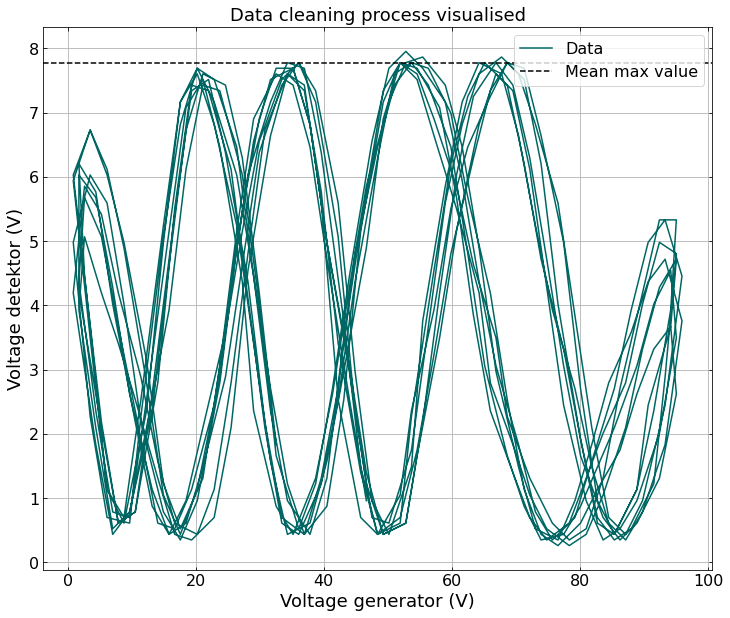

In [9]:
# Make a visualisation of data cleaning process for report

# Load in a percent of the data
angle = 8
df_8 = load_data(angle = angle, procent_of_data = 0.01, length_of_data = length)

# Scale mean peak voltage by a factor 10 (due to amplifier)
df_8['Kanal A'] = df_8.apply(factor_10_2, axis = 1)

# Calculate the mean of the peaks
index = int(len(df_8) / 80)
mean = np.mean(sorted(list(df_8['Kanal B']))[-index])

# Make ax and fig
fig, ax = make_ax(df_8, x = 'Kanal A', y = 'Kanal B', figsize = (12, 10), 
                  title = 'Data cleaning process visualised', 
                  xlabel = 'Voltage generator (V)', ylabel = 'Voltage detektor (V)', label = 'Data')
plt.axhline(y = mean, color = "black", linestyle = "--", label = 'Mean max value')

# Plot ax
plot_ax(ax, grid = True, legend = True, save = True, filename = '../../../Final_graphs/data_cleaning_process_eks_2_visualised.pdf')